<a href="https://colab.research.google.com/github/Pridefrancas/DATATHON-2DTAT/blob/main/Analise_PRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sqlalchemy import create_engine

def create_conn():
    # Defina os parâmetros de conexão
    db_user = 'magic-steps_owner'
    db_password = 'FGD4APlVcW0u'
    db_host = 'ep-curly-wave-a4dkdimo.us-east-1.aws.neon.tech'
    db_port = '5432'
    db_name = 'magic-steps'

    # Crie a URL de conexão
    connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

    # Crie um engine do SQLAlchemy
    engine = create_engine(connection_url)
    return engine
engine = create_conn()




In [3]:
# Defina a consulta SQL para a view
query = 'SELECT * FROM magic_steps.inativos_full'

# Execute a consulta e carregue os resultados em um DataFrame
df_inativos_full = pd.read_sql(query, engine)

# Mostre as primeiras linhas do DataFrame
print(df_inativos_full.head())

              motivoinativacao nomedisciplina  notafase       nomefase  \
0  Outras prioridades/trabalho         INGLÊS       5.5  DIAGNOSTICA 1   
1  Outras prioridades/trabalho         INGLÊS       0.0  DIAGNOSTICA 1   
2  Outras prioridades/trabalho         INGLÊS       0.0  DIAGNOSTICA 1   
3  Outras prioridades/trabalho     MATEMÁTICA       6.5  DIAGNOSTICA 1   
4  Outras prioridades/trabalho      PORTUGUÊS       4.5  DIAGNOSTICA 1   

   idfasenota  numerofase  idade corraca sexo    datasituacaoativo  \
0         278           1   19.0       B    F  2022-01-01 00:00:00   
1         278           1   19.0       R    F  2022-01-01 00:00:00   
2         278           1   20.0       R    F  2022-01-01 00:00:00   
3         266           1   20.0       R    F  2022-01-01 00:00:00   
4         266           1   20.0       R    F  2022-01-01 00:00:00   

   datasituacaoinativo datahoraefetivacaomatricula  diasmatriculado  
0  2022-05-05 00:00:00         2022-02-28 00:00:00             6

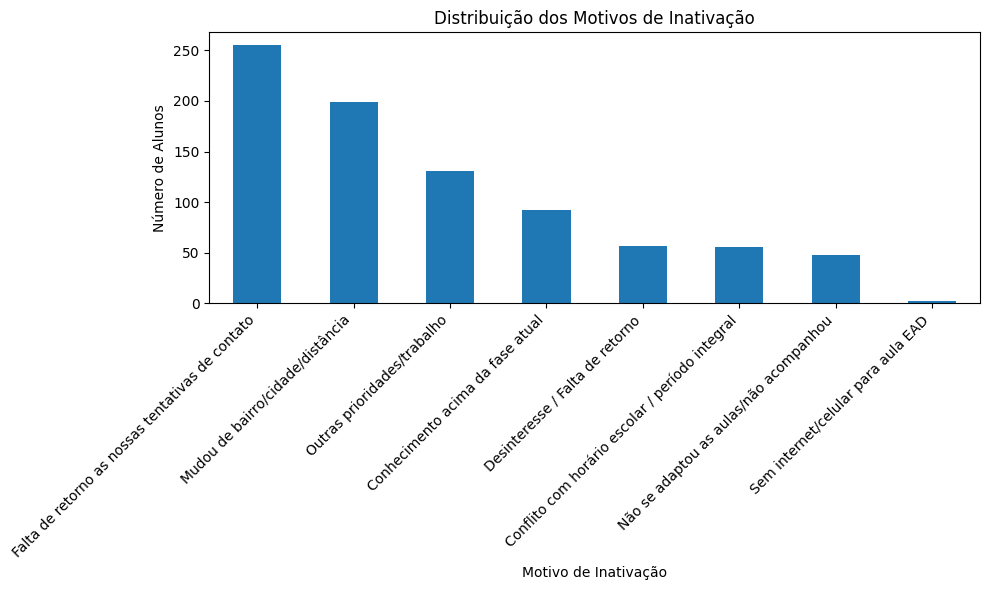

In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of each inactivation reason
reason_counts = df_inativos_full['motivoinativacao'].value_counts()

# Plot the distribution of inactivation reasons
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar')
plt.title('Distribuição dos Motivos de Inativação')
plt.xlabel('Motivo de Inativação')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

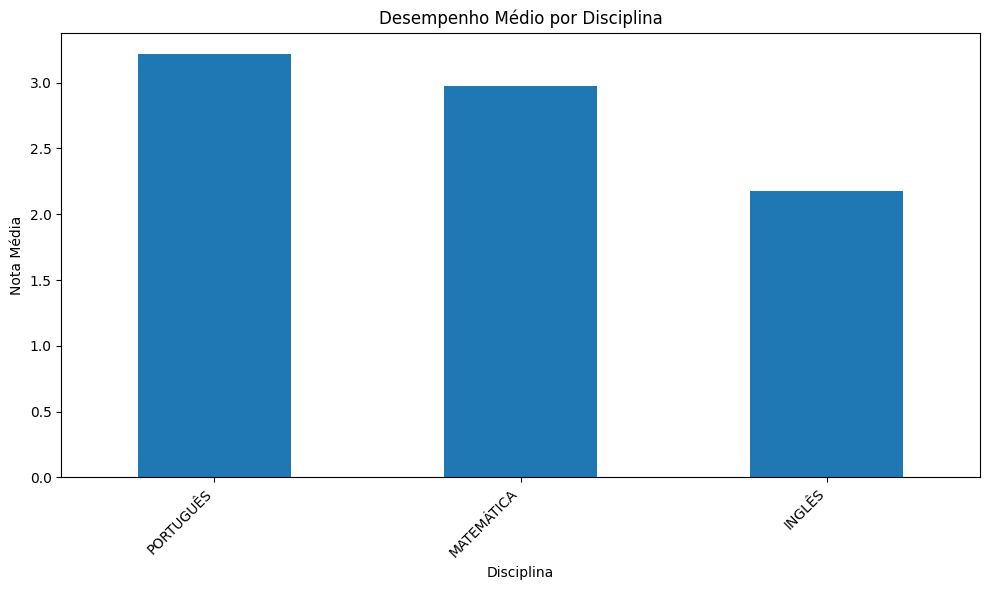

,nomedisciplina,Nota Média
0,PORTUGUÊS,3.218153
1,MATEMÁTICA,2.975146
2,INGLÊS,2.176630


In [ ]:
# Calculate the average grade per discipline
average_grade_per_discipline = df_inativos_full.groupby('nomedisciplina')['notafase'].mean().sort_values(ascending=False)

# Plot the average grades per discipline
plt.figure(figsize=(10, 6))
average_grade_per_discipline.plot(kind='bar')
plt.title('Desempenho Médio por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the average grades in a table
average_grade_per_discipline.reset_index(name='Nota Média')


#Motivos de inativação entre os alunos:

**Outras prioridades/trabalho:** Este é o motivo mais frequente para a inativação dos alunos. Isso sugere que muitos estudantes estão priorizando o trabalho ou outras atividades sobre seus estudos.

**Sem adaptação ao curso:** Outro motivo comum, indicando que alguns alunos podem não ter se ajustado bem ao curso ou à instituição.

**Desistência por motivos pessoais:** Reflete que questões pessoais são uma razão significativa para alguns alunos deixarem o curso.

**Problemas financeiros:** Também aparece com frequência, indicando que dificuldades econômicas têm um impacto considerável na continuidade dos estudos.

Este gráfico ajuda a entender melhor os desafios enfrentados pelos alunos e pode auxiliar na formulação de estratégias para reduzir as taxas de inativação, como suporte financeiro, aconselhamento acadêmico e ajustes curriculares.

In [4]:
# Ler as tabelas do PostgreSQL para dataframes pandas
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Agrupar pelos campos necessários e contar
grouped_df = filtered_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

print(result_df)

      SituacaoAlunoTurma   ano  count
1               Cursando  2024   1807
5             Desistente  2024    249
8        Mudança de Fase  2024     36
0    Aprovado P. Parcial  2023     71
4             Desistente  2023    469
7        Mudança de Fase  2023     75
9              Reprovado  2023     27
12  Troca de Fase *Anual  2023   1446
3             Desistente  2022    784
6        Mudança de Fase  2022    125
11  Troca de Fase *Anual  2022   3026
2             Desistente  2021     43
10  Troca de Fase *Anual  2021    962


<ipython-input-4-6f6fae780626>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-4-6f6fae780626>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


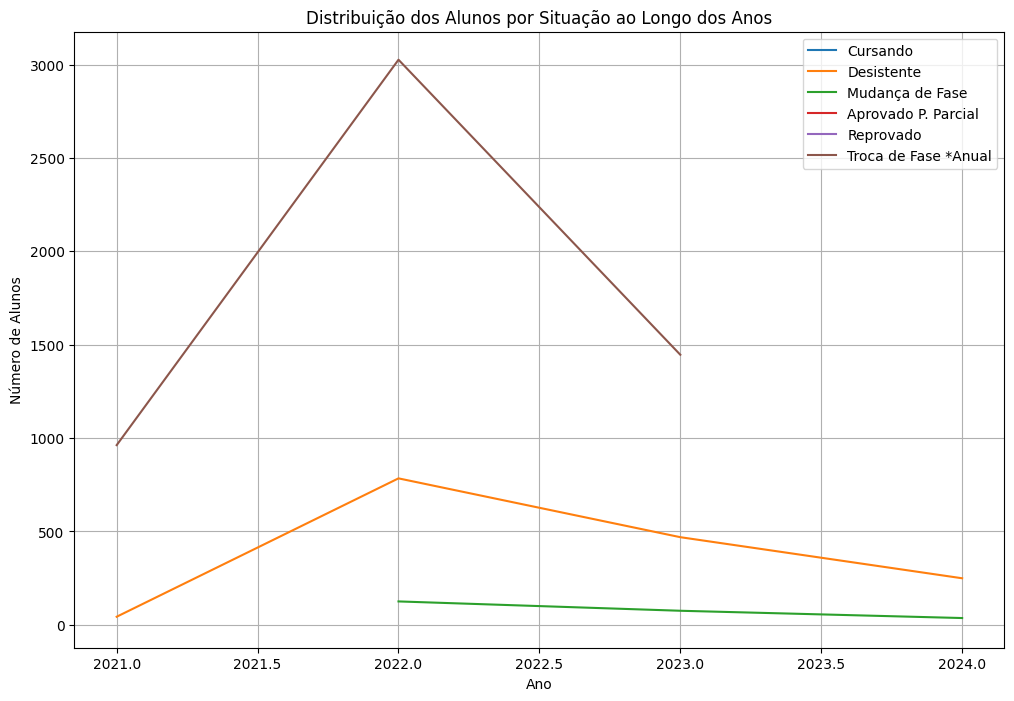

In [5]:
import matplotlib.pyplot as plt

# Plotar a distribuição dos alunos por situação ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Alunos por Situação ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()




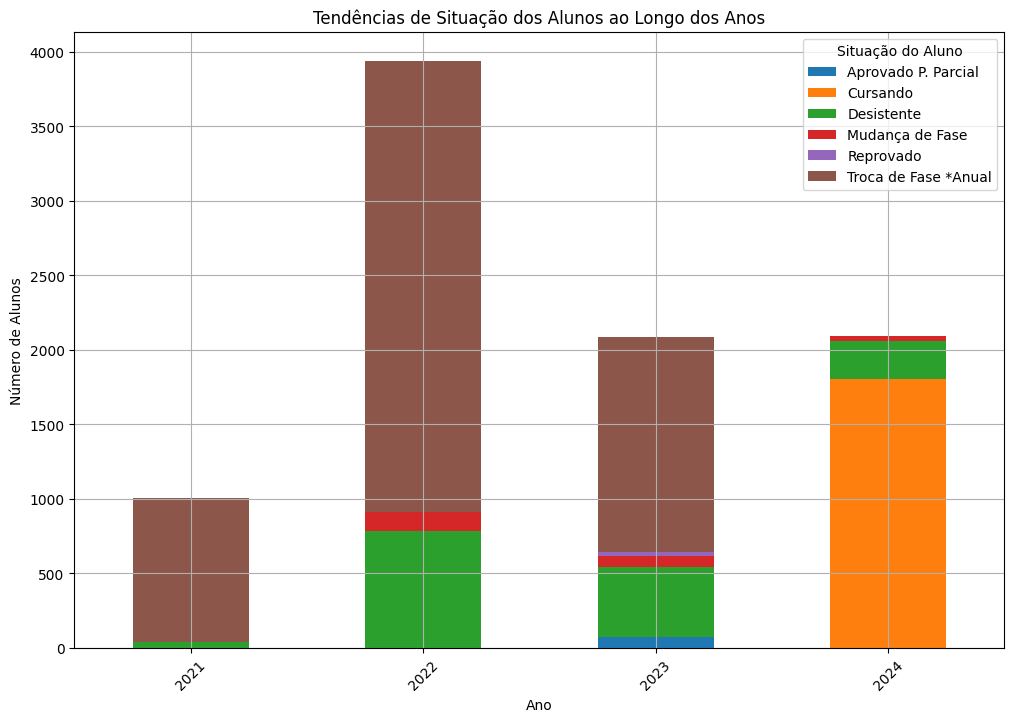

In [7]:
# Análise de tendências
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Situação dos Alunos ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


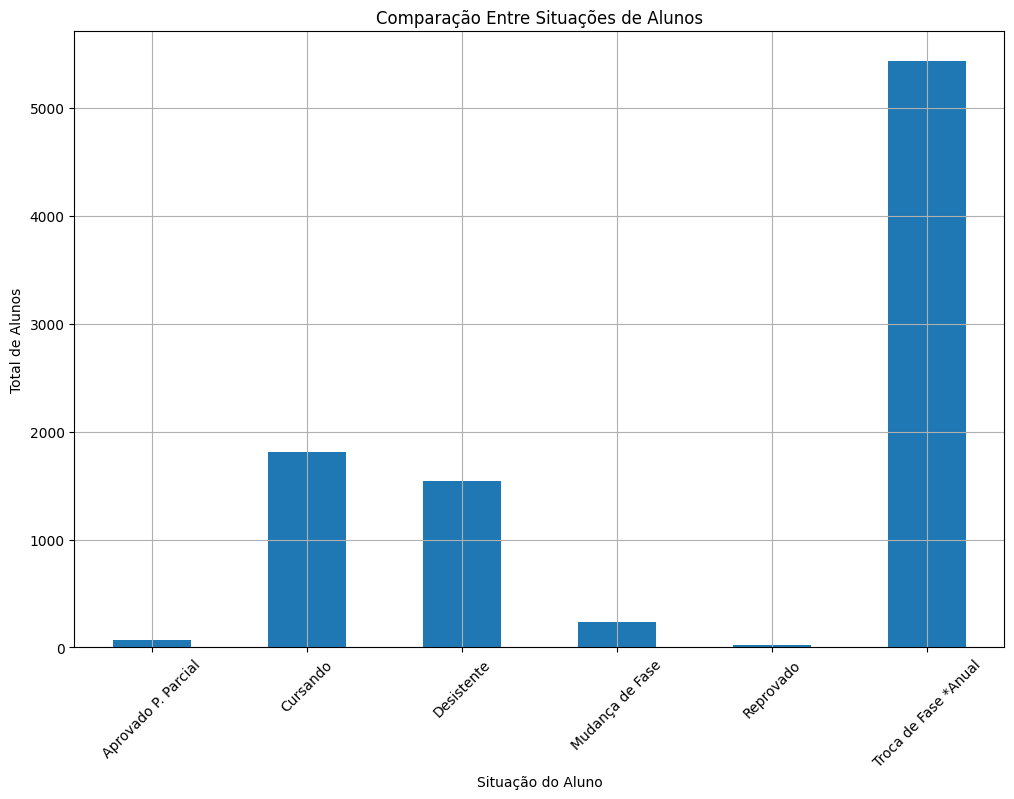

In [8]:

# Comparação entre situações
plt.figure(figsize=(12, 8))
result_df.groupby('SituacaoAlunoTurma')['count'].sum().plot(kind='bar')

plt.xlabel('Situação do Aluno')
plt.ylabel('Total de Alunos')
plt.title('Comparação Entre Situações de Alunos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-11-7816771c3e0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-11-7816771c3e0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


  SituacaoAlunoTurma   ano  count
3         Desistente  2024    249
2         Desistente  2023    469
1         Desistente  2022    784
0         Desistente  2021     43


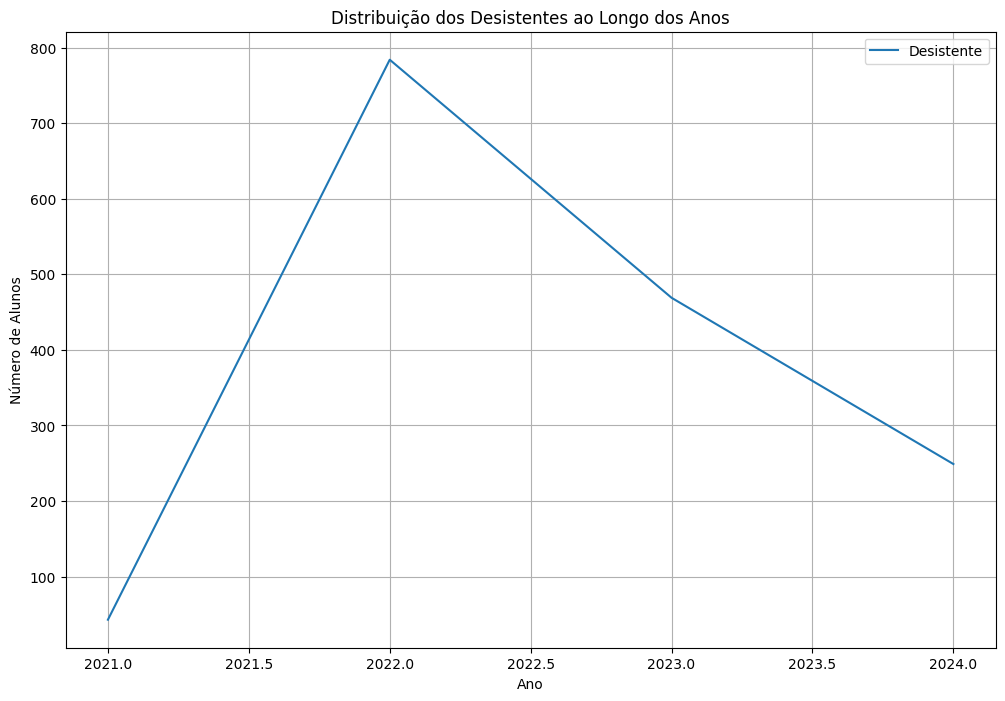

<Figure size 1200x800 with 0 Axes>

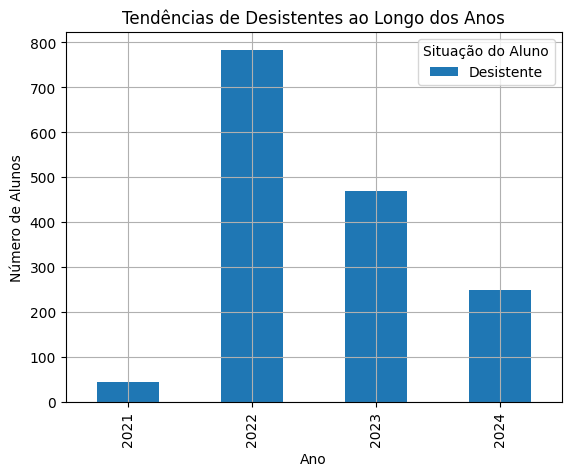

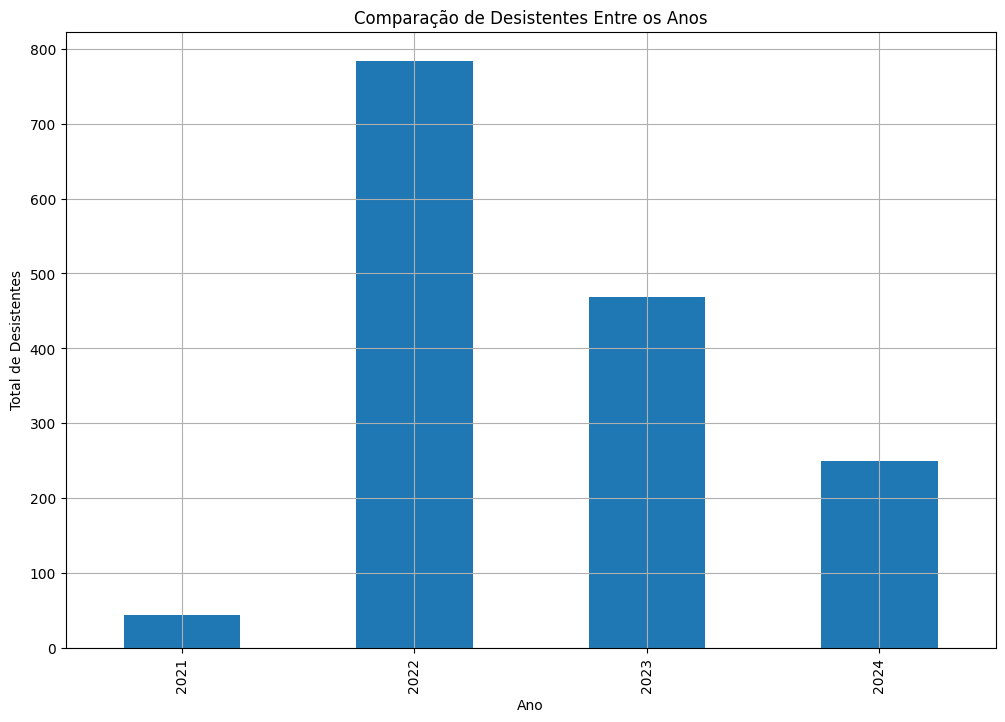

In [ ]:
# Conectar ao banco de dados e ler as tabelas
engine = create_conn()
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Filtrar apenas os "Desistentes"
desistentes_df = filtered_df[filtered_df['SituacaoAlunoTurma'] == 'Desistente']

# Agrupar pelos campos necessários e contar
grouped_df = desistentes_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

# Mostrar os dados
print(result_df)

# Plotar a distribuição dos desistentes ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Desistentes ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

# Análise de tendências
plt.figure(figsize=(12, 8))
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Desistentes ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.grid(True)
plt.show()

# Comparação entre anos
plt.figure(figsize=(12, 8))
result_df.groupby('ano')['count'].sum().plot(kind='bar')

plt.xlabel('Ano')
plt.ylabel('Total de Desistentes')
plt.title('Comparação de Desistentes Entre os Anos')
plt.grid(True)
plt.show()

<ipython-input-12-7816771c3e0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-12-7816771c3e0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


  SituacaoAlunoTurma   ano  count
3         Desistente  2024    249
2         Desistente  2023    469
1         Desistente  2022    784
0         Desistente  2021     43


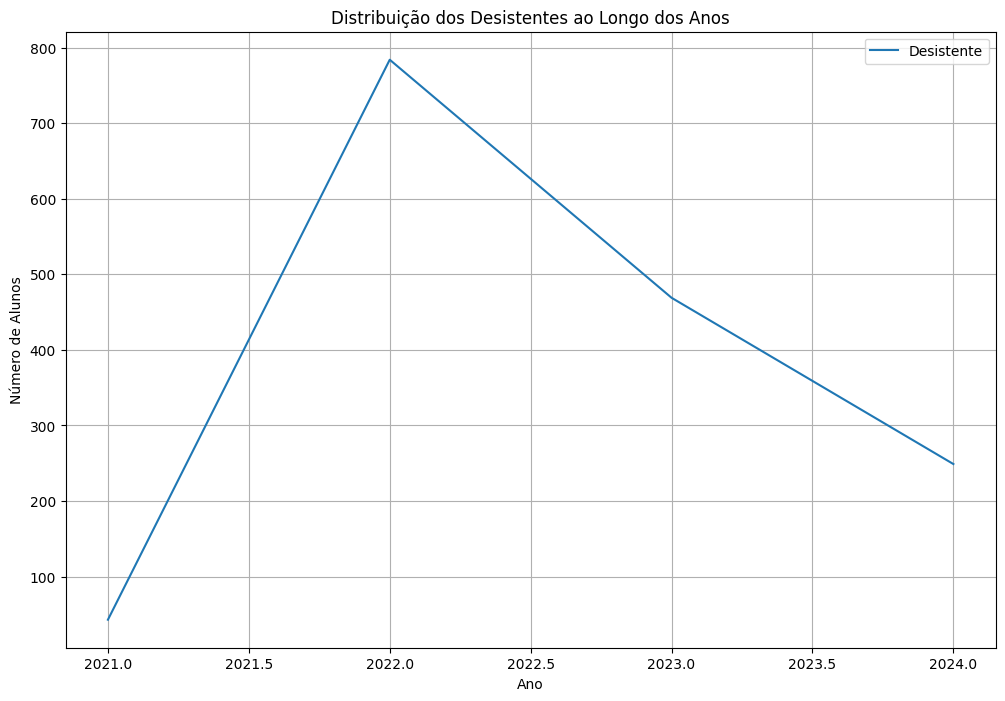

<Figure size 1200x800 with 0 Axes>

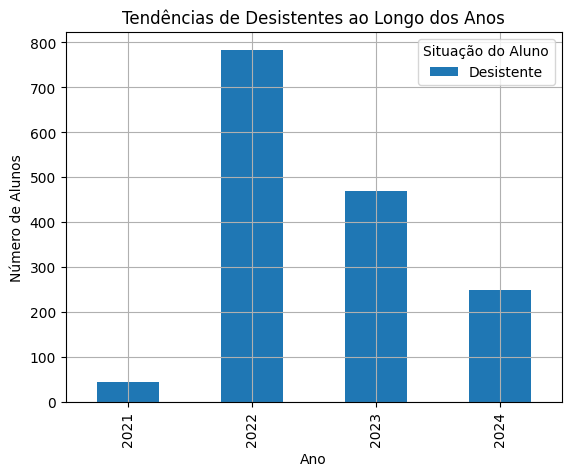

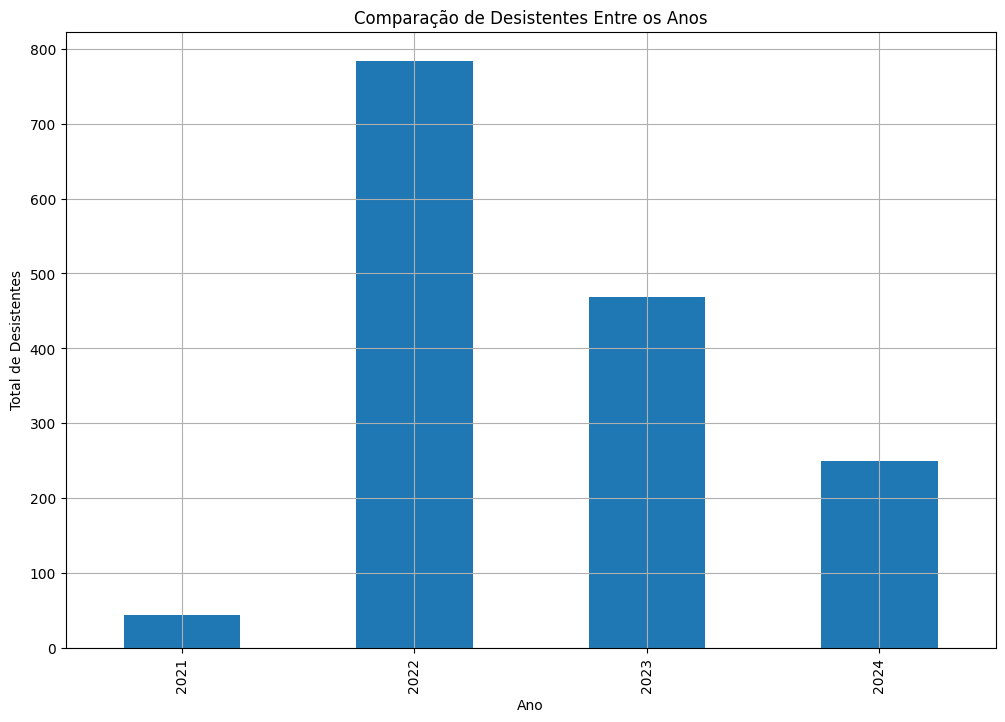

In [ ]:
# Conectar ao banco de dados e ler as tabelas
engine = create_conn()
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Filtrar apenas os "Desistentes"
desistentes_df = filtered_df[filtered_df['SituacaoAlunoTurma'] == 'Desistente']

# Agrupar pelos campos necessários e contar
grouped_df = desistentes_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

# Mostrar os dados
print(result_df)

# Plotar a distribuição dos desistentes ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Desistentes ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

# Análise de tendências
plt.figure(figsize=(12, 8))
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Desistentes ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.grid(True)
plt.show()

# Comparação entre anos
plt.figure(figsize=(12, 8))
result_df.groupby('ano')['count'].sum().plot(kind='bar')

plt.xlabel('Ano')
plt.ylabel('Total de Desistentes')
plt.title('Comparação de Desistentes Entre os Anos')
plt.grid(True)
plt.show()

In [11]:
# Defina a consulta SQL para a view
query = 'SELECT * FROM magic_steps.vw_aluno_obs'

# Execute a consulta e carregue os resultados em um DataFrame
df = pd.read_sql(query, engine)

# Mostre as primeiras linhas do DataFrame
print(df.head())

   IdAluno  IdUnidade Sexo  EstadoCivil       DataNascimento CorRaca  \
0      456        1.0    M          5.0  2009-12-31 02:00:00       B   
1      456        1.0    M          5.0  2009-12-31 02:00:00       B   
2      456        1.0    M          5.0  2009-12-31 02:00:00       B   
3      444        1.0    F          5.0  2007-09-05 00:00:00       B   
4      152        1.0    M          5.0  2006-03-25 03:00:00       B   

  EnsinoMedio_IdEstabelecimentoEnsino EnsinoMedio_AnoConclusao  IdTurma  \
0                                None                     None      445   
1                                None                     None      224   
2                                None                     None      169   
3                                None                     None       88   
4                                None                     None      226   

   IdSituacaoAlunoTurma  ...  \
0                    14  ...   
1                    14  ...   
2                   

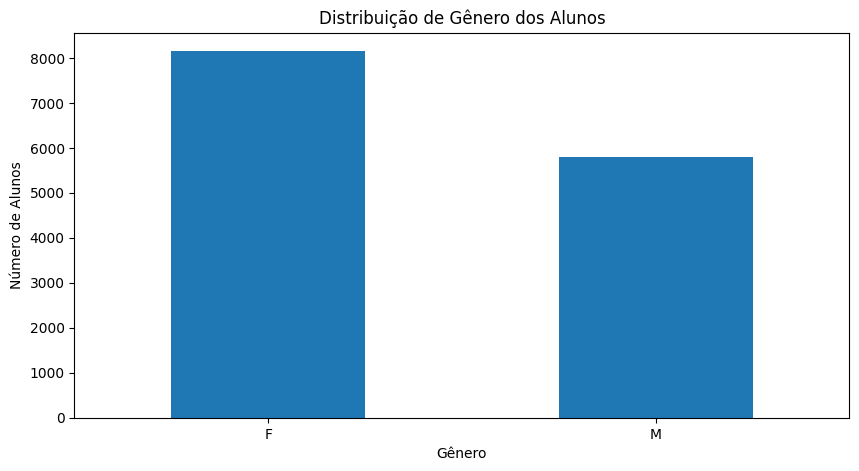

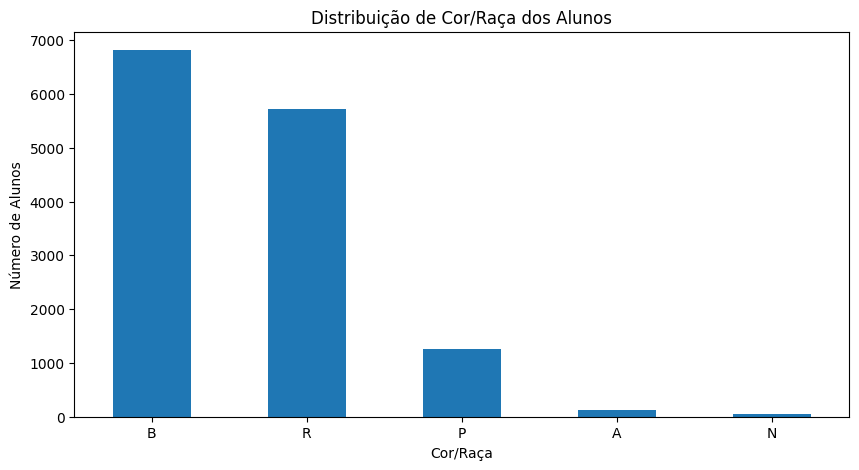

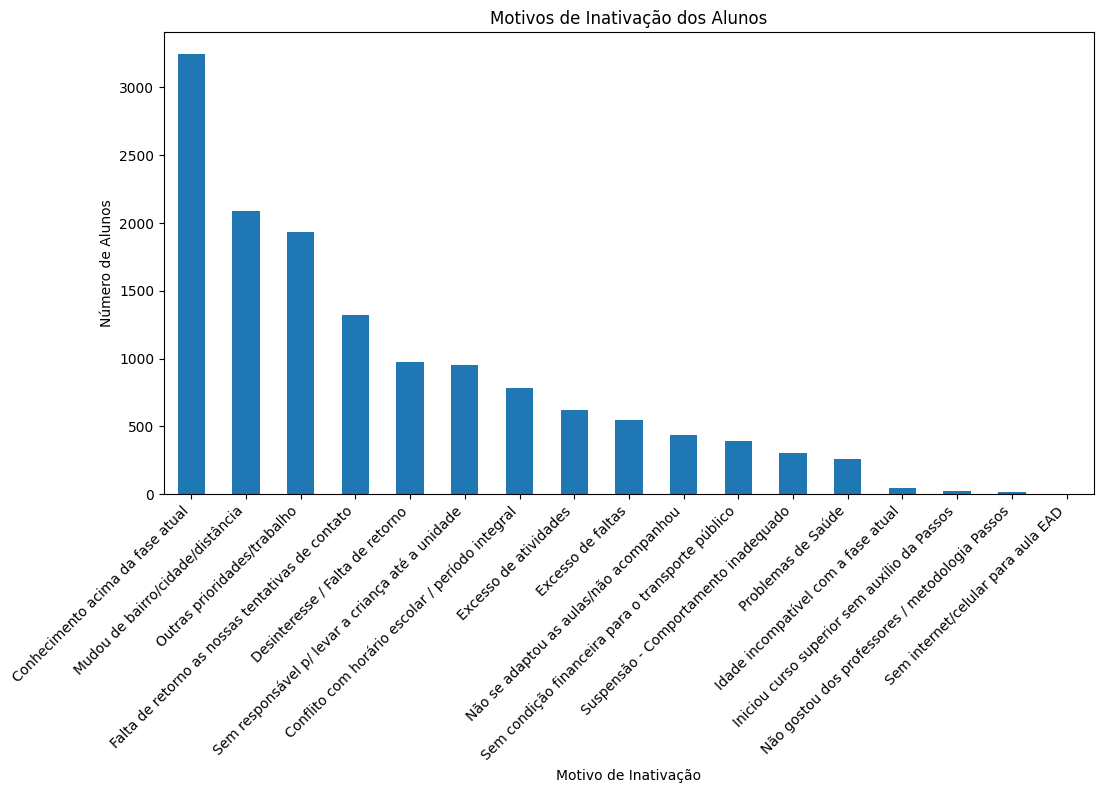

In [12]:
# Process the data for gender and race distribution
gender_distribution = df['Sexo'].value_counts()
race_distribution = df['CorRaca'].value_counts()

# Process the data for reasons of inactivation
inactivation_reasons = df['MotivoInativacao'].value_counts()

# Plotting gender distribution
plt.figure(figsize=(10, 5))
gender_distribution.plot(kind='bar')
plt.title('Distribuição de Gênero dos Alunos')
plt.xlabel('Gênero')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)
plt.show()

# Plotting race distribution
plt.figure(figsize=(10, 5))
race_distribution.plot(kind='bar')
plt.title('Distribuição de Cor/Raça dos Alunos')
plt.xlabel('Cor/Raça')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)
plt.show()

# Plotting reasons for inactivation
plt.figure(figsize=(12, 6))
inactivation_reasons.plot(kind='bar')
plt.title('Motivos de Inativação dos Alunos')
plt.xlabel('Motivo de Inativação')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45, ha='right')
plt.show()

**Distribuição de Gênero:**

A distribuição de gênero entre os alunos parece ser equilibrada, com uma representação significativa tanto de alunos do sexo masculino quanto do sexo feminino.

**Distribuição de Cor/Raça: ** **negrito**

A maioria dos alunos se identifica com uma cor/raça específica (representada pelo código "B" no gráfico), o que pode indicar a predominância de um grupo racial na amostra.

**Motivos de Inativação:**

O motivo mais comum para a inativação dos alunos é "Falta de retorno às nossas tentativas de contato", seguido por "Conflito com horário escolar / período integral". Isso sugere que a comunicação e a compatibilidade de horários são áreas críticas que precisam de atenção.

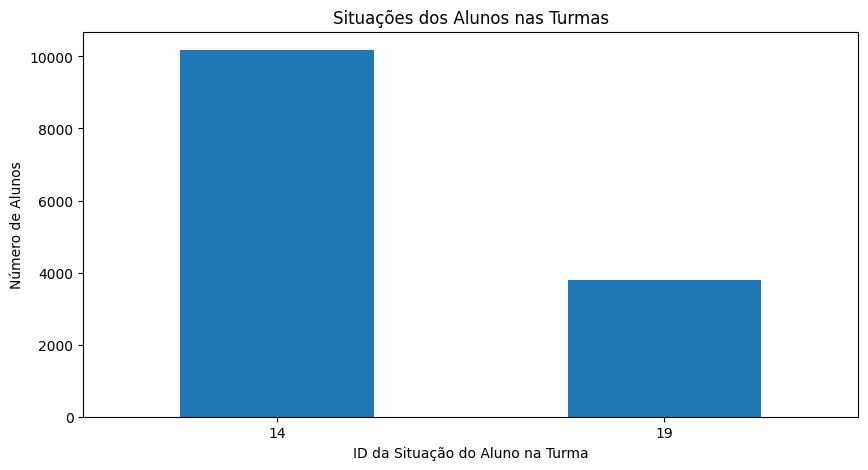

,IdSituacaoAlunoTurma,ComentarioInativacao
0,14,
3,14,Retorno das aulas na escola para o presencial ...
9,19,
54,19,Alfa N - 1N\nAdriana reavaliou e julga o aluno...
675,19,Vide ocorrência


In [13]:
# Analyzing the student situations in classes
student_situations = df['IdSituacaoAlunoTurma'].value_counts()

# Map situation IDs to more descriptive labels if available
# Note: We don't have a mapping provided in the dataset, so we will work with the IDs for now.

# Plotting the distribution of student situations in classes
plt.figure(figsize=(10, 5))
student_situations.plot(kind='bar')
plt.title('Situações dos Alunos nas Turmas')
plt.xlabel('ID da Situação do Aluno na Turma')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0)
plt.show()

# Checking for any specific situation codes with the comments, if available
unique_situations_with_comments = df[['IdSituacaoAlunoTurma', 'ComentarioInativacao']].dropna().drop_duplicates()

unique_situations_with_comments.head()


Situações dos Alunos nas Turmas
A análise das situações dos alunos nas turmas revela o seguinte:

Distribuição das Situações:

A maioria dos alunos está associada a um único código de situação, que é o "14". Esse código representa uma categoria comum de situação dos alunos em suas respectivas turmas.
Comentários Associados:

Para algumas situações, existem comentários adicionais que fornecem contexto. Por exemplo:
Situação "14" está associada a comentários sobre "Retorno das aulas na escola para o presencial" e "Falta de condições financeiras para o transporte".
Situação "19" tem comentários como "Alfa N - 1N" e "Vide ocorrência", indicando reavaliações ou referências a outras ocorrências.
Essas informações podem ser úteis para entender melhor as razões por trás das situações dos alunos nas turmas e ajudar a identificar áreas onde intervenções ou suporte adicional podem ser necessários.